[ 788872.31295355 1409078.77442572 2855085.13606865 ... 1276224.19329317
 1506666.82609684 3423892.20384543]


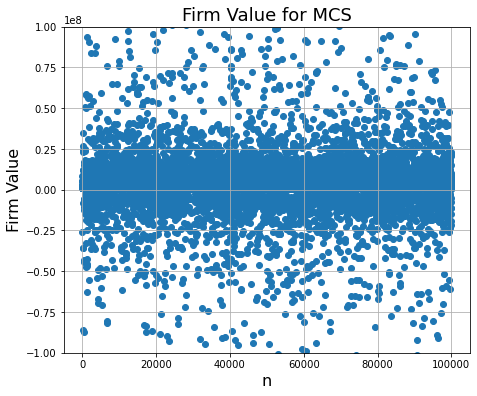

In [30]:
import numpy as np
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt
#Standatd Monte Carlo Simulation
n = 100000
high_growth_mu = 0.1785
high_growth_sigma = 0.0634
stable_growth_mu = 0.0216
stable_growth_sigma = 0.0223
WACC_mu = 0.0855
WACC_sigma = 0.0223
EBIT2024 = 39531
Dep_2025 = 16218
CapEx_2025 = -60851
NWCT2025 = -2819
tax = 0.12
CF = [66303,79580,92858,106135]
#CF2021 = 66303
#CF2022 = 79580
#CF2023 = 92858
#CF2024 = 106135
numbers=[x for x in range(0,n)]
g_stable = np.random.normal(stable_growth_mu, stable_growth_sigma, n)
g_high = np.random.normal(high_growth_mu, high_growth_sigma, n)
WACC = np.random.normal(WACC_mu, WACC_sigma,n)




CF2025 = EBIT2024*(1+g_high)+Dep_2025-CapEx_2025-NWCT2025

Firmvalue1 = CF[0]/(1+WACC) + CF[1]/((1+WACC)**2) + CF[2]/((1+WACC)**3) + CF[3]/((1+WACC)**4) + CF2025/((WACC-g_stable)*(1+WACC)**4) 
print(Firmvalue1)


fig1 = plt.figure(figsize=(16,6))
axes1 = fig1.add_subplot(1, 2, 1)

axes1.set_xlabel("n", fontsize=16)
axes1.set_ylabel("Firm Value", fontsize=16)
axes1.set_title("Firm Value for MCS", fontsize=18)
axes1.grid()
plt.ylim(-100000000,100000000)
plt.scatter(numbers,Firmvalue1)
plt.show()


In [31]:
Std = np.std(Firmvalue1)
Mean = np.mean(Firmvalue1)
print(Std)
print(Mean)
num_firmvalue_count = np.sum(list(Firmvalue1(lambda x:x >=12006865 & x <= 15606865, Firmvalue1)))
print(num_firmvalue_count)

123780761.81582174
1624022.5313281182


In [32]:
k_star = []
for i in Firmvalue1:
    k = np.log(i)
    if k< 100 :
        k_star.append(k)
lnV = np.std(k_star)
print(lnV)

0.6320871812481121


<ipython-input-32-3f338b21abb1>:3: RuntimeWarning: invalid value encountered in log
  k = np.log(i)


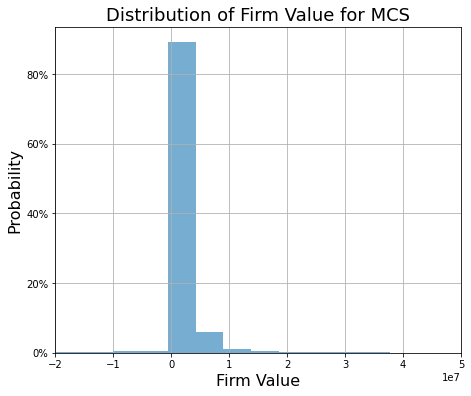

In [33]:

import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

fig4 = plt.figure(figsize=(16,6))
axes4 = fig4.add_subplot(1, 2, 1)
plt.hist(Firmvalue1,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes4.set_xlabel("Firm Value", fontsize=16)
axes4.set_ylabel("Probability", fontsize=16)
axes4.set_title("Distribution of Firm Value for MCS", fontsize=18)
axes4.grid()
plt.xlim([-20000000,50000000])
def to_percent(temp, position):
  return '%1.0f'%(10/10000*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()


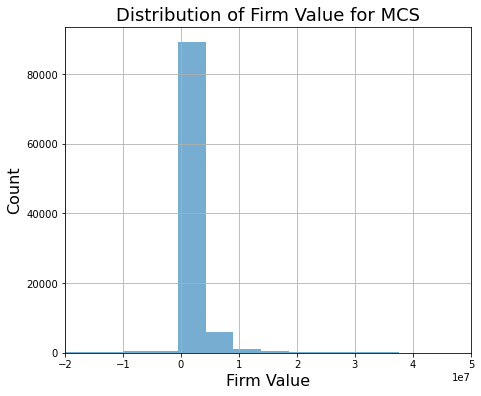

In [34]:

fig2 = plt.figure(figsize=(16,6))
axes2 = fig2.add_subplot(1, 2, 1)
plt.hist(Firmvalue1,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes2.set_xlabel("Firm Value", fontsize=16)
axes2.set_ylabel("Count", fontsize=16)
axes2.set_title("Distribution of Firm Value for MCS", fontsize=18)
axes2.grid()
plt.xlim(-20000000,50000000)
plt.show()

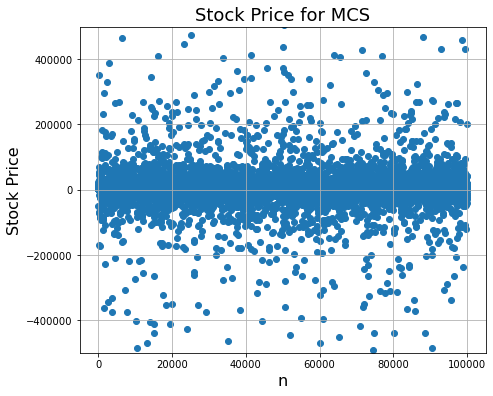

In [35]:
outstandingshares = 510
Stockprice = Firmvalue1/outstandingshares
fig3 = plt.figure(figsize=(16,6))
axes3 = fig3.add_subplot(1, 2, 1)
#axes1.plot(numbers, Firmvaluereal, 'b')
axes3.set_xlabel("n", fontsize=16)
axes3.set_ylabel("Stock Price", fontsize=16)
axes3.set_title("Stock Price for MCS", fontsize=18)
axes3.grid()
plt.ylim(-500000,500000)
plt.scatter(numbers,Stockprice)
plt.show()


In [ ]:
import numpy as np
Std = np.std(Stockprice)
Stcokprice_MCS = np.mean(Stockprice)
print(Std)
print(Stcokprice_MCS)
num_count = np.sum(list(Stockprice(lambda x:x >=2000 & x <= 5000, Stockprice)))
print(num_count)

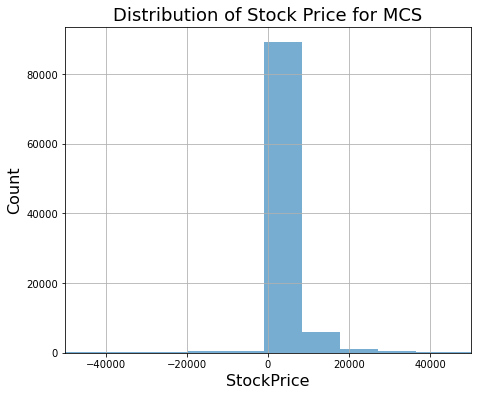

In [37]:

fig6 = plt.figure(figsize=(16,6))
axes6 = fig6.add_subplot(1, 2, 1)
plt.hist(Stockprice,bins =10000, histtype="bar", rwidth=1, alpha=0.6)
axes6.set_xlabel("StockPrice", fontsize=16)
axes6.set_ylabel("Count", fontsize=16)
axes6.set_title("Distribution of Stock Price for MCS", fontsize=18)
axes6.grid()
plt.xlim(-50000,50000)
plt.show()

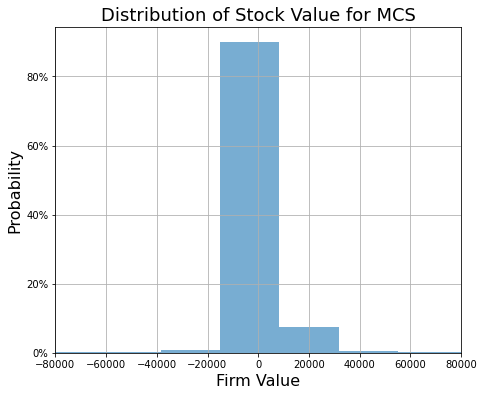

In [38]:
fig5 = plt.figure(figsize=(16,6))
axes5 = fig5.add_subplot(1, 2, 1)
plt.hist(Stockprice,bins =4000, histtype="bar", rwidth=1, alpha=0.6)
axes5.set_xlabel("Firm Value", fontsize=16)
axes5.set_ylabel("Probability", fontsize=16)
axes5.set_title("Distribution of Stock Value for MCS", fontsize=18)
axes5.grid()
plt.xlim([-80000,80000])
def to_percent(temp, position):
  return '%1.0f'%(10/10000*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

In [39]:
import math
#Black-Scholes
S = 1686027
K = 17017
t = 6
r = 0.0319
sigama = lnV
sigama_square = lnV**2
d_1 = (np.log(S/K)+(r + sigama_square/2)*t)/(sigama*np.sqrt(t))
d_2 = d_1 -sigama*np.sqrt(t)
print(d_1)
print(d_2)
N_d1 =1
N_d2 = 0.998
C = S*N_d1 - K*math.e**(-r*t)*N_d2
print(C)
StockPrice_BS = C/510
print(StockPrice_BS)

3.86614639192217
2.317855324910188
1671974.3239422182
3278.3810273376826


In [43]:
Firmvalue_DCF = 1623621
StcokPrice_DCF = Firmvalue_DCF/outstandingshares
print(StcokPrice_DCF)
Stockprice_target = 0.5*StcokPrice_DCF+0.25*Stcokprice_MCS+0.25*StockPrice_BS 
print(Stockprice_target)

3183.570588235294
3207.470027093302


<BarContainer object of 5 artists>

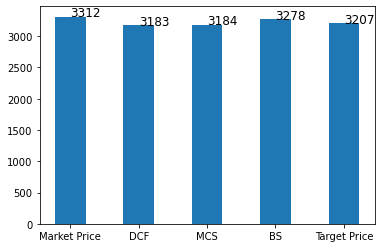

In [44]:
a = 'Market Price'
b = 'DCF'
c = 'MCS'
d = 'BS'
e = 'Target Price'
x = (a,b,c,d,e)
y = (3312,3183,3184,3278,3207)

for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=12))

plt.bar(x,y, width = 0.45)
